<a href="https://colab.research.google.com/github/AlbertJQM/IA/blob/main/ProyectoINF354.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO INF - 354

Univ. Quisbert Mújica Albert Jhonatan

---
# Descripción del Problema (Clasificación de variedades de arroz)

Entre los arroces certificados cultivados en **TURQUÍA**, se ha seleccionado para el estudio la especie **Osmancik**, que tiene una gran área de siembra desde **1997** y la especie **Cammeo** cultivada desde **2014**. Al observar las características generales de las especies de **Osmancik**, tienen un aspecto ancho, largo, vidrioso y opaco. Al observar las características generales de las especies de **Cammeo**, tienen un aspecto ancho y largo, vidrioso y opaco. Se tomaron un total de **3810 imágenes** de granos de arroz para las dos especies, se procesaron y se hicieron inferencias de características. Se obtuvieron **7 características morfológicas** para cada grano de arroz.

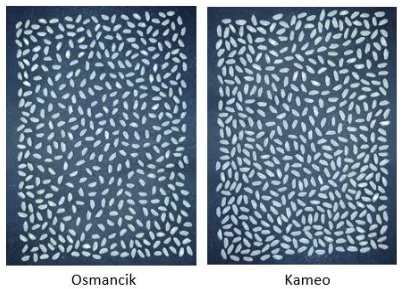

---
# Descripción del Dataset

Origen del dataset: [International Journal of Intelligent Systems and Applications in Engineering](https://www.ijisae.org/IJISAE/article/view/1068)

# Atributos

*  ***AREA (INTEGER)*** -> Devuelve el número de píxeles dentro de los límites del grano de arroz.
*   ***PERIMETER (FLOAT)*** -> Calcula la circunferencia calculando la distancia entre píxeles alrededor de los límites del grano de arroz.
*   ***MAJORAXIS (FLOAT)*** -> La línea más larga que se puede trazar en el grano de arroz, es decir, la distancia del eje principal.
*   ***MINORAXIS (FLOAT)*** -> La línea más corta que se puede trazar en el grano de arroz, es decir, la distancia del eje pequeño.
*   ***ECCENTRICITY (FLOAT)*** -> Mide qué tan redonda es la elipse del grano de arroz.
*   ***CONVEX_AREA (INTEGER)*** -> Devuelve el recuento de píxeles de la cáscara convexa más pequeña de la región formada por el grano de arroz.
*   ***EXTENT (FLOAT)*** -> Devuelve la relación entre la región formada por el grano de arroz y los píxeles del cuadro delimitador.
*   ***CLASS (CLASS)*** -> Arroces Cammeo y Osmancik.

Todos estas características se las obtuvo en base a Computer Vision realizando el siguiente proceso:

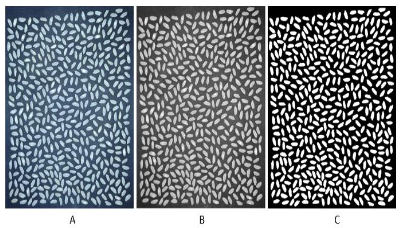

El dataset cuenta con 56 datos perdidos, los cuales se encuentran distrubuidos de la siguiente manera:
*   AREA -> 26 datos
*   PERIMETER -> 8 datos
*   MAJORAXIS -> 12 datos
*   MINORAXIS -> 0 datos
*   ECCENTRICITY -> 0 datos
*   CONVEX_AREA -> 8 datos
*   EXTENT -> 0 datos
*   CLASS -> 0 datos


---

In [ ]:
import pandas as pd
df = pd.read_csv("rice_dataset.csv")
print(df.dtypes)
print(df.head(30))
print(df.tail(30))

AREA            float64
PERIMETER       float64
MAJORAXIS       float64
MINORAXIS       float64
ECCENTRICITY    float64
CONVEX_AREA       int64
EXTENT          float64
CLASS            object
dtype: object
       AREA   PERIMETER   MAJORAXIS  ...  CONVEX_AREA    EXTENT     CLASS
0   11621.0  402.210998  153.584992  ...        11797  0.810108  Osmancik
1   11449.0  411.299988  156.925491  ...        11696  0.724254  Osmancik
2    9722.0  373.752991  145.264465  ...         9839  0.819109  Osmancik
3   10880.0  394.644989  153.794815  ...        11057  0.747766  Osmancik
4   11945.0  414.145996  162.352783  ...        12106  0.797769  Osmancik
5   11455.0  405.618988  159.570267  ...        11639  0.776189  Osmancik
6   11714.0  412.201996  161.308182  ...        11886  0.764322  Osmancik
7   13751.0  451.941009  175.411179  ...        14063  0.757005  Osmancik
8   12714.0  434.118012  169.255219  ...        12993  0.741947  Osmancik
9   10884.0  406.718994  156.777130  ...        11233 

Podemos observar la distribución de todos los registros en cada tipo de arroz mediante una gráfica empleando la librería **Matplotlib**:


---



Osmancik    2195
Cammeo      1615
Name: CLASS, dtype: int64


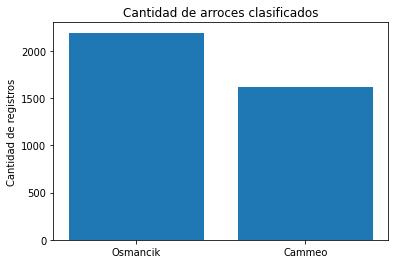

In [ ]:
import matplotlib.pyplot as plt
#Obtenemos la cantidad existente de cada arroz dentro del df.
c = df["CLASS"].value_counts()
a = [c[0], c[1]]
print(c)
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y.
ax.set_ylabel('Cantidad de registros')
#Colocamos una etiqueta en el eje X.
ax.set_title('Cantidad de arroces clasificados')
#Creamos la grafica de barras utilizando los tipos de arroz como eje X y la cantidad de cada arroz como eje y.
plt.bar(["Osmancik","Cammeo"], a)
#Finalmente mostramos la grafica con el metodo show().
plt.show()

También podemos observar las caracteristicas estadisticas en forma tabulaar de todas las columnas del dataset.

In [ ]:
df.describe()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
count,3783.000000,3802.000000,3798.000000,3810.000000,3810.000000,3810.000000,3802.000000
mean,12669.002379,454.054444,188.607011,86.401328,0.886441,12954.009186,0.662143
std,1725.407969,35.527411,17.418485,5.654379,0.020739,1772.196718,0.076788
min,7833.000000,359.100006,145.264465,63.565002,0.777233,8015.000000,0.510953
25%,11377.500000,425.962746,174.232189,82.850586,0.871757,11627.250000,0.599352
50%,12418.000000,448.598511,185.605263,86.489933,0.888853,12704.500000,0.645367
75%,13950.000000,483.586998,203.387390,90.174871,0.902318,14284.000000,0.726080
max,18913.000000,548.445984,239.010498,107.542450,0.932860,19099.000000,0.861050


# Preprocesamiento

Se emplearán dos tipos de preprocesamiento por columna en el dataset:


*   Imputación para reemplazar todos los valores NaN existentes dentro del dataset.
*   Normalización para poder reducir los datos elevados dentro del dataset en un rango de 0 - 1.


Pero antes de realizar el preprocesamiento se realizará la conversion de la columna clase a Entero empleando dummies. En este proceso se convertirá a la clase con los siguientes valores:


*   Osmancik -> 1
*   Cammeo -> 0

---



In [ ]:
df = pd.get_dummies(df,columns=["CLASS"],drop_first=True)
print(df.head(10))
print(df.tail(10))

      AREA   PERIMETER   MAJORAXIS  ...  CONVEX_AREA    EXTENT  CLASS_Osmancik
0  11621.0  402.210998  153.584992  ...        11797  0.810108               1
1  11449.0  411.299988  156.925491  ...        11696  0.724254               1
2   9722.0  373.752991  145.264465  ...         9839  0.819109               1
3  10880.0  394.644989  153.794815  ...        11057  0.747766               1
4  11945.0  414.145996  162.352783  ...        12106  0.797769               1
5  11455.0  405.618988  159.570267  ...        11639  0.776189               1
6  11714.0  412.201996  161.308182  ...        11886  0.764322               1
7  13751.0  451.941009  175.411179  ...        14063  0.757005               1
8  12714.0  434.118012  169.255219  ...        12993  0.741947               1
9  10884.0  406.718994  156.777130  ...        11233  0.723670               1

[10 rows x 8 columns]
         AREA   PERIMETER   MAJORAXIS  ...  CONVEX_AREA    EXTENT  CLASS_Osmancik
3800  11856.0  456.421997 

Ahora que ya se tiene la conversion de la clase se procederá a eliminar la columna del Dataframe y recuperarla en otro dataframe. Se realizará este proceso para poder aplicar el preprocesamiento al resto de los datos sin afectar a la clase.


---



In [ ]:
df_y = df["CLASS_Osmancik"]
df = df.drop(['CLASS_Osmancik'], axis=1)
print(df_y)

0       1
1       1
2       1
3       1
4       1
       ..
3805    0
3806    0
3807    0
3808    0
3809    0
Name: CLASS_Osmancik, Length: 3810, dtype: uint8


Como ya se tiene el dataframe sin la columna de la clase es posible realizar la limpieza y preprocesamiento mencionado anteriormente. Se comenzará aplicando la **Imputación** a todas las columnas del dataframe reemplazando los valores **NaN** por la **media** de cada columna. Se empleará el **imputer** que se encuentra en la libreria **sklearn**.


---

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imputacion = SimpleImputer(missing_values=np.nan,strategy="mean")
df_imputado = imputacion.fit_transform(df)

Como ya se empleó la imputación todo el dataset ahora se procederá con la normalización de los datos. Al igual que en el paso anterior se empleará la librería **sklearn**.

---

In [ ]:
from sklearn import preprocessing
df_normalizado = preprocessing.normalize(df_imputado)

Una vez terminado los dos preprocesamientos en el dataset se procederá a construir el dataframe con los nuevos datos obtenidos por el preprocesamiento.


---

In [ ]:
data = pd.DataFrame(df_normalizado)
columnas =["AREA","PERIMETER","MAJORAXIS","MINORAXIS","ECCENTRICITY","CONVEX_AREA","EXTENT"]
data.columns = columnas
print(data)

          AREA  PERIMETER  MAJORAXIS  ...  ECCENTRICITY  CONVEX_AREA    EXTENT
0     0.701524   0.024280   0.009271  ...      0.000047     0.712148  0.000049
1     0.699256   0.025120   0.009584  ...      0.000049     0.714342  0.000044
2     0.702556   0.027009   0.010497  ...      0.000058     0.711011  0.000059
3     0.701105   0.025431   0.009911  ...      0.000052     0.712511  0.000048
4     0.702107   0.024343   0.009543  ...      0.000048     0.711570  0.000047
...        ...        ...        ...  ...           ...          ...       ...
3805  0.692357   0.026657   0.011613  ...      0.000052     0.720956  0.000029
3806  0.691447   0.025776   0.011299  ...      0.000049     0.721867  0.000033
3807  0.700771   0.025778   0.011330  ...      0.000049     0.712818  0.000036
3808  0.702072   0.024060   0.010684  ...      0.000044     0.711609  0.000038
3809  0.697958   0.024085   0.010528  ...      0.000043     0.715646  0.000026

[3810 rows x 7 columns]


# Desarrollo de Modelado y Pruebas

Ahora que se aplicó la limpieza y preprocesamiento del dataset ya se pueden separar los datos para el desarrollo y evaluación de los modelos. Se separará los valores de **X (data)** e **y (target)**.


---

In [ ]:
X = np.array(data[["AREA","PERIMETER","MAJORAXIS","MINORAXIS","ECCENTRICITY","CONVEX_AREA","EXTENT"]])#Data
y = np.array(df_y)#Target
print("DATOS")
print(X)
print("OBJETIVOS")
print(y)

DATOS
[[7.01523633e-01 2.42802272e-02 9.27144834e-03 ... 4.69191144e-05
  7.12148205e-01 4.89037048e-05]
 [6.99256326e-01 2.51204576e-02 9.58434296e-03 ... 4.88307649e-05
  7.14342038e-01 4.42343319e-05]
 [7.02555726e-01 2.70090829e-02 1.04974678e-02 ... 5.78504653e-05
  7.11010676e-01 5.91924955e-05]
 ...
 [7.00771101e-01 2.57784745e-02 1.13296368e-02 ... 4.90570567e-05
  7.12817833e-01 3.56354495e-05]
 [7.02071597e-01 2.40602823e-02 1.06840536e-02 ... 4.36375771e-05
  7.11608571e-01 3.81643617e-05]
 [6.97957569e-01 2.40845530e-02 1.05282428e-02 ... 4.25658344e-05
  7.15645942e-01 2.62528244e-05]]
OBJETIVOS
[1 1 1 ... 0 0 0]


Una vez definido los valores de X e y podremos definir la cantidad de splits que utilizaremos para probar con cada modelo y asi elegir el mejor. Se definirá la cantidad del dataset que se irá destinada para la parte del testeo.

Los **splits** son una lista de indices aleatorios sin repeticion que estarán esparados entre indices de entrenamiento e indices de testeo.

---



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
iter_for_prediction = cv.split(X, y)

Ya que se tienen los splits definidos ahora se procede a la elección de los modelos para realizar el entrenamiento.

Entre los modelos a utilizar están los siguientes:


*   Árbol de decisión.
*   Perceptrón.
*   Perceptrón Multicapa (Red Neuronal).

Todas estos modelos se encuentran dentro de la libreria **sklearn**.

---

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Como ya se tienen definidos los modelos se puede empezar a entrenar cada **split** generado con todos los modelos para poder determinar un **score** y así verificar cual de los modelos es el más adecuado para este problema. Todo se realizará dentro de un bucle que recorrerá cada split.


---

In [ ]:
scores_tr = []#Lista con los scores de los datos de entrenamiento
scores_ts = []#Lista con los scores de los datos de evaluación
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    fila = []
    filat = []
    #Separación de las divisiones del dataset en base al indice asignado en cada split.
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    #Modelos
    dtc = DecisionTreeClassifier(random_state=0)
    pct = Perceptron(tol=1e-2)
    mlpc = MLPClassifier(tol=1e-2)
    rfc = RandomForestClassifier(random_state=0)
    #Entrenamiento
    dtc.fit(X_train, y_train)
    pct.fit(X_train, y_train)
    mlpc.fit(X_train, y_train)
    rfc.fit(X_train, y_train)
    #Score Entrenamiento
    sdtc = dtc.score(X_train, y_train)
    spct = pct.score(X_train, y_train)
    smlpc = mlpc.score(X_train, y_train)
    srfc = rfc.score(X_train, y_train)
    fila.extend([index + 1, sdtc, spct, smlpc, srfc])
    scores_tr.append(fila)#Se añade el registro a la lista de entrenamiento.
    #Score Evaluación
    sdtc = dtc.score(X_test, y_test)
    spct = pct.score(X_test, y_test)
    smlpc = mlpc.score(X_test, y_test)
    srfc = rfc.score(X_test, y_test)
    filat.extend([index + 1, sdtc, spct, smlpc, srfc])
    scores_ts.append(filat)#Se añade el registro a la lista de evaluación.

Una vez realizado el entrenamiento y obtenido los scores podemos crear un **dataframe** para una mejor visualización de la lista generada y asi poder comparar cada modelo.

A continuación se puede ver el **score** del entrenamiento:


---

In [ ]:
col = ["Split", "Decision Tree", "Perceptron", "MLP", "Random Forest"]
score_train = pd.DataFrame(scores_tr)
score_train.columns = col
print("Score de los datos de entrenamiento")
print(score_train)

Score de los datos de entrenamiento
   Split  Decision Tree  Perceptron       MLP  Random Forest
0      1            1.0    0.423885  0.576115       1.000000
1      2            1.0    0.803150  0.576115       1.000000
2      3            1.0    0.828084  0.576115       1.000000
3      4            1.0    0.798885  0.576115       1.000000
4      5            1.0    0.576115  0.576115       1.000000
5      6            1.0    0.670604  0.576115       0.999672
6      7            1.0    0.423885  0.576115       1.000000
7      8            1.0    0.576115  0.576115       0.999672
8      9            1.0    0.782808  0.576115       1.000000
9     10            1.0    0.790682  0.576115       1.000000


Ahora se mostrará el **score** de evaluación:

---

In [ ]:
score_test = pd.DataFrame(scores_ts)
score_test.columns = col 
print("Score de los datos de testeo")
print(score_test)

Score de los datos de testeo
   Split  Decision Tree  Perceptron       MLP  Random Forest
0      1       0.884514    0.423885  0.576115       0.931759
1      2       0.904199    0.763780  0.576115       0.950131
2      3       0.897638    0.845144  0.576115       0.938320
3      4       0.895013    0.807087  0.576115       0.919948
4      5       0.912073    0.576115  0.576115       0.930446
5      6       0.898950    0.654856  0.576115       0.930446
6      7       0.901575    0.423885  0.576115       0.937008
7      8       0.900262    0.576115  0.576115       0.942257
8      9       0.892388    0.799213  0.576115       0.925197
9     10       0.896325    0.783465  0.576115       0.930446


En ambas tablas se puede observar que el mejor resultado obtenido es por **Random Forest**, pero el resultado se encuentra por encima del 90% lo cual expresaria un sobreajuste y los demas modelos están por debajo del 70%. El modelo de **Árbol de decisión** es con el cuál se procederá a generar la matriz de confusión de cada split.


---

In [ ]:
from sklearn.metrics import confusion_matrix
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
iter_for_prediction = cv.split(X, y)
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    #Entrenamiento con Arbol de decision
    print("Split", index + 1)
    dtc.fit(X_train, y_train)
    print(dtc.score(X_test, y_test))
    y_pred_dtc = dtc.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_dtc)
    confusion = pd.DataFrame(cm, index = ['Cammeo', 'Osmancik'], columns = ['Cammeo', 'Osmancik'])
    print(confusion,"\n")

Split 1
0.884514435695538
          Cammeo  Osmancik
Cammeo       274        49
Osmancik      39       400 

Split 2
0.9041994750656168
          Cammeo  Osmancik
Cammeo       287        36
Osmancik      37       402 

Split 3
0.8976377952755905
          Cammeo  Osmancik
Cammeo       281        42
Osmancik      36       403 

Split 4
0.89501312335958
          Cammeo  Osmancik
Cammeo       278        45
Osmancik      35       404 

Split 5
0.9120734908136483
          Cammeo  Osmancik
Cammeo       292        31
Osmancik      36       403 

Split 6
0.8989501312335958
          Cammeo  Osmancik
Cammeo       287        36
Osmancik      41       398 

Split 7
0.9015748031496063
          Cammeo  Osmancik
Cammeo       283        40
Osmancik      35       404 

Split 8
0.9002624671916011
          Cammeo  Osmancik
Cammeo       281        42
Osmancik      34       405 

Split 9
0.8923884514435696
          Cammeo  Osmancik
Cammeo       283        40
Osmancik      42       397 

Split 10
0.89

# Conclusión

Debido a todo el proceso desarrollado en el proyecto se puede llegar a la conclusion de que el modelo de Árbol de decisión es optimo para realizar la prediccion de los tipos de arroces establecidos en el dataset (Cammeo y Osmancik). Se debe tomar en consideración de que en el sitio del dataset se encuentra las pruebas realizadas en Turquia.